# Useful Info for CT/MRI denoising

#### There are many useful algorithms for denoising, including...
    1) Gaussian filtering
    2) Bilateral
    3) Anisotropic diffusion
    4) Total variational
    5) Wavelet denoising
    6) Nonlocal Means Denoising
    7) BM3D
    8) Markov Random Field
    9) and others...

In [4]:
from skimage import img_as_float
from skimage.metrics import peak_signal_noise_ratio
import matplotlib.pyplot as plt
from skimage import io
from scipy import ndimage as nd
from skimage.restoration import (denoise_tv_chambolle,
                                 denoise_bilateral,
                                 denoise_wavelet,estimate_sigma)

to_mris_path = '/Users/matthewmiller/Desktop/sreeni_github/images/MRI_images'
to_noisy_MRI = to_mris_path + '/MRI_noisy.tif'
to_clean_MRI = to_mris_path + '/MRI_clean.tif'


#### A brief note about reading in our images as floating point images

We are converting to float for a number of reasons. 1) Most scipy/sklearn functionality requires floating point inputs. 2) We are going to be doing lots of math on these images and we don't want to have to drop information by being constricted uint8.

In [21]:
#let's quickly define a function for subplotting original v. cleaned
#images:

def subplot_imgs(im_list,label_list=None):
    fig, axs = plt.subplots(1,len(im_list), figsize=(20, 20), facecolor='w', edgecolor='k')
    axs = axs.ravel()

    for i in range(len(im_list)):
        axs[i].imshow(im_list[i],cmap='gray')
        if label_list != None:
            axs[i].set_title(str(label_list[i]),size=30)




## Gaussian filtering

Good but blurry!

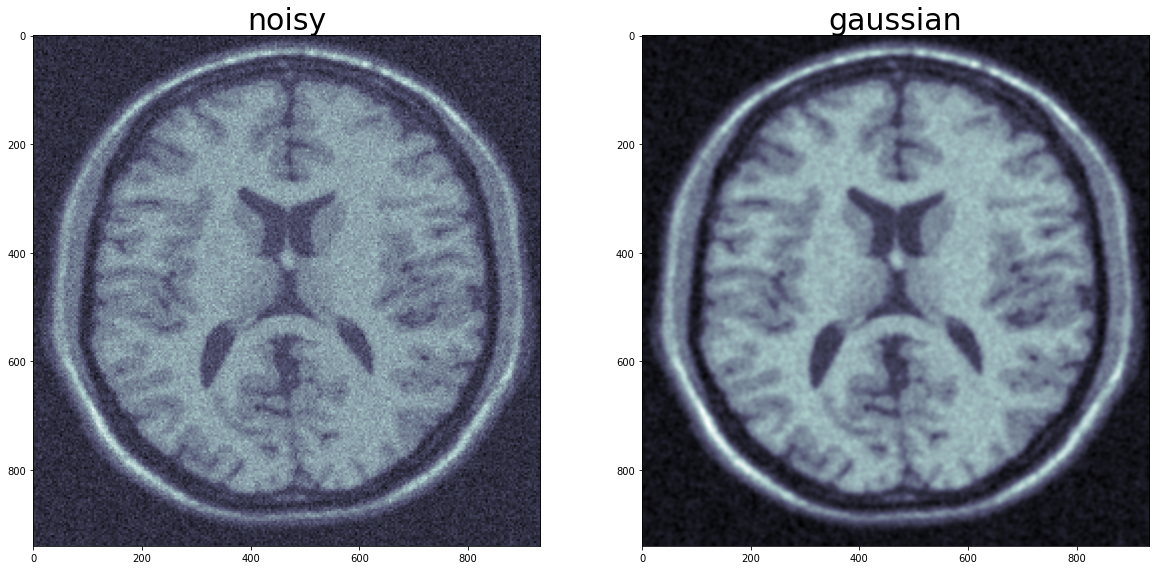

In [6]:
#an input noisy image
noisy_img = img_as_float(io.imread(to_noisy_MRI))

#an input reference/clean image to which we can compare!
ref_img = img_as_float(io.imread(to_clean_MRI))


#Start with a gaussian filter:
gaussian_img = nd.gaussian_filter(noisy_img,sigma=3)

subplot_imgs([noisy_img,gaussian_img],['noisy','gaussian'])

### Now we can compare the signal-to-noise ratio in our reference image vs. noisy image and our reference image vs. Gaussian image using `peak_signal_noise_ratio`

In [7]:
noise_psnr = peak_signal_noise_ratio(ref_img,noisy_img)
gaussian_cleaned_psnr = peak_signal_noise_ratio(ref_img,gaussian_img)
print("PSNR of input noisy image = ",noise_psnr)
print("PSNR of cleaned image = ", gaussian_cleaned_psnr)

PSNR of input noisy image =  17.03789982624248
PSNR of cleaned image =  17.268761790926092


## Bilateral Denoising Filter
Just look it up, this apparently takes forever to process.

## Total Variational Filtering:

PSNR of input noisy image =  17.03789982624248
PSNR of cleaned image =  17.19161931394431


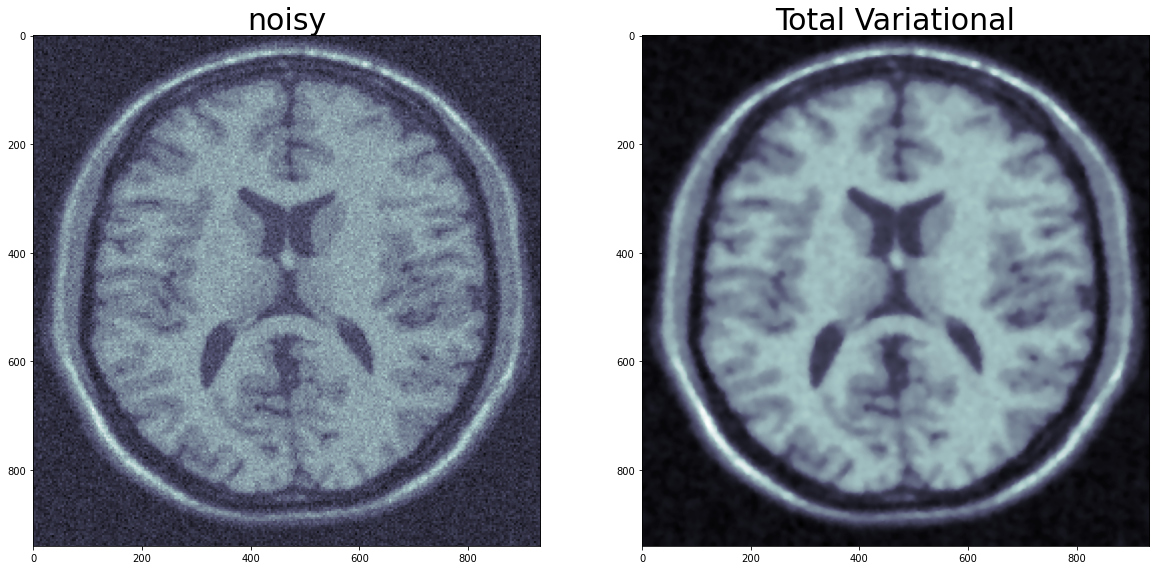

In [8]:
#Start with a gaussian filter:
TV = denoise_tv_chambolle(noisy_img,weight=0.3,multichannel=False)
noise_psnr = peak_signal_noise_ratio(ref_img,noisy_img)
gaussian_cleaned_psnr = peak_signal_noise_ratio(ref_img,TV)
print("PSNR of input noisy image = ",noise_psnr)
print("PSNR of cleaned image = ", gaussian_cleaned_psnr)

subplot_imgs([noisy_img,TV],['noisy','Total Variational'])


## Wavelet Denoising:

Another one! Didn't do a great job with how we set our parameters, though. 

You can also check out something called **shift-invariant wavelet denoising**. Try to find it somewhere?

PSNR of input noisy image =  17.03789982624248
PSNR of cleaned image =  17.0525032515753


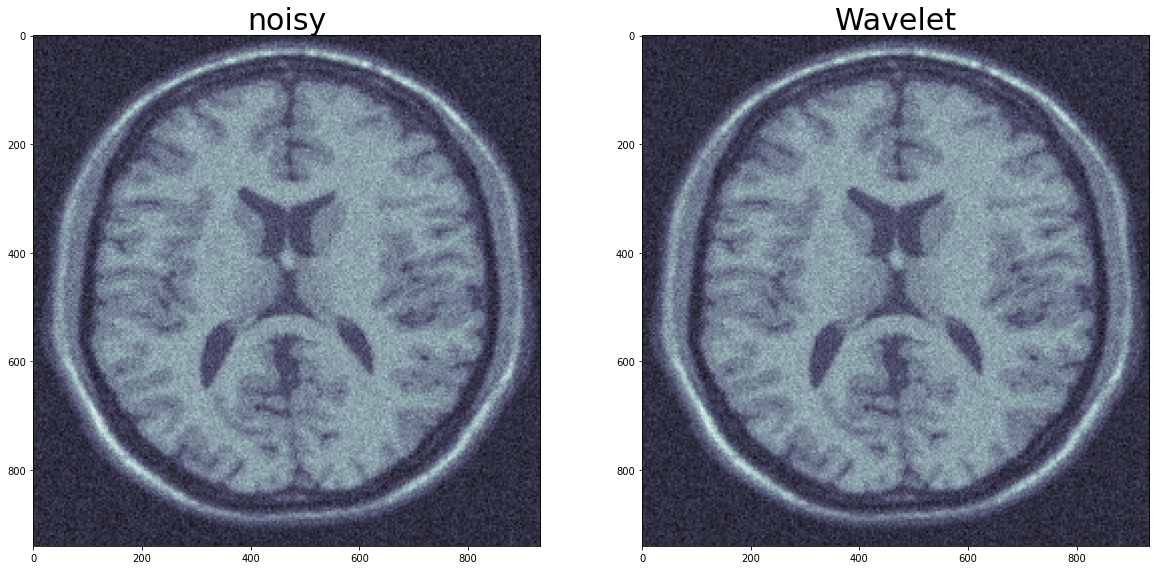

In [9]:
#Start with a gaussian filter:
wavelet = denoise_wavelet(noisy_img,multichannel=False,
                         method='BayesShrink',mode='soft',
                         rescale_sigma=True)
noise_psnr = peak_signal_noise_ratio(ref_img,noisy_img)
gaussian_cleaned_psnr = peak_signal_noise_ratio(ref_img,wavelet)
print("PSNR of input noisy image = ",noise_psnr)
print("PSNR of cleaned image = ", gaussian_cleaned_psnr)

subplot_imgs([noisy_img,wavelet],['noisy','Wavelet'])

## Anisotropic Diffusion:

Check out the docs for more details. This one comes from the `medpy` package.

In [10]:
from medpy.filter import anisotropic_diffusion


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im_true.
  after removing the cwd from sys.path.


PSNR of input noisy image =  17.03789982624248
PSNR of cleaned image =  17.261005740495744


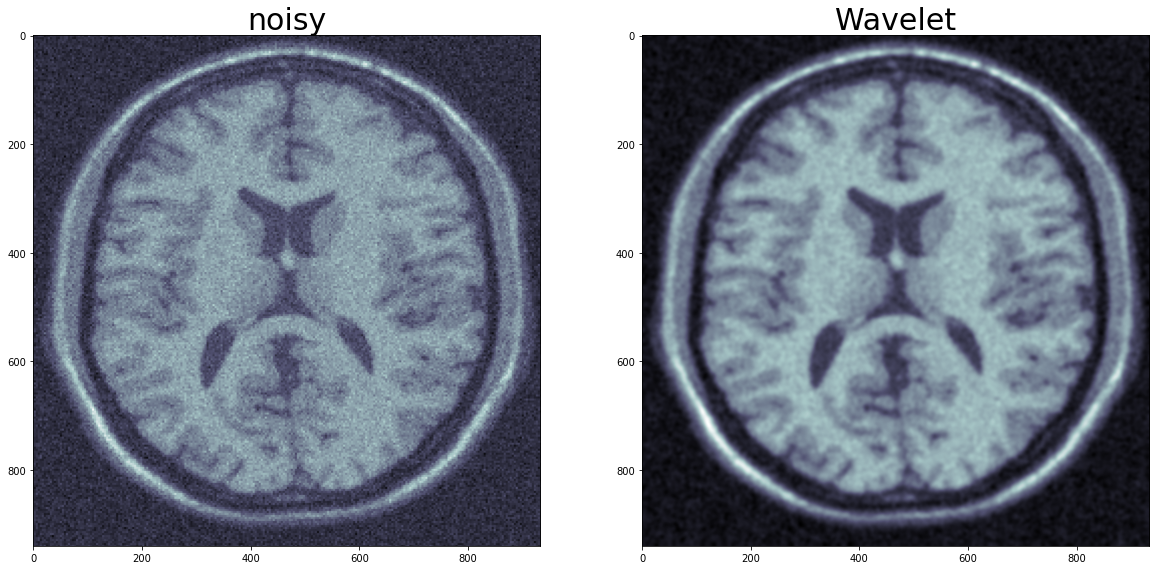

In [16]:
#Start with a gaussian filter:
aniso = anisotropic_diffusion(noisy_img,niter=50,kappa=50,gamma=0.1,option=1)
noise_psnr = peak_signal_noise_ratio(ref_img,noisy_img)
gaussian_cleaned_psnr = peak_signal_noise_ratio(ref_img,aniso)
print("PSNR of input noisy image = ",noise_psnr)
print("PSNR of cleaned image = ", gaussian_cleaned_psnr)

subplot_imgs([noisy_img,aniso],['noisy','Wavelet'])

## Another option (not shown here): Non-Local Means Filtering

## Another popular option for CT/MRI: BM3D (Block Matching and 3D filtering)

Look at the docs for more specifics of the image, or the original paper associated with this algorithm. It looks like this one takes awhile to run, but it seems to give us the best performance so far!!

In [17]:
import bm3d

In [19]:
#Start with a gaussian filter:
bm3d = bm3d.bm3d(noisy_img,sigma_psd=0.2,stage_arg=bm3d.BM3DStages.ALL_STAGES)
noise_psnr = peak_signal_noise_ratio(ref_img,noisy_img)
gaussian_cleaned_psnr = peak_signal_noise_ratio(ref_img,bm3d)
print("PSNR of input noisy image = ",noise_psnr)
print("PSNR of cleaned image = ", gaussian_cleaned_psnr)

subplot_imgs([noisy_img,aniso],['noisy','BM3D'])

PSNR of input noisy image =  17.03789982624248
PSNR of cleaned image =  17.37203924579462


In [23]:
subplot_imgs([bm3d,noisy_img],['BM3D','noisy'])